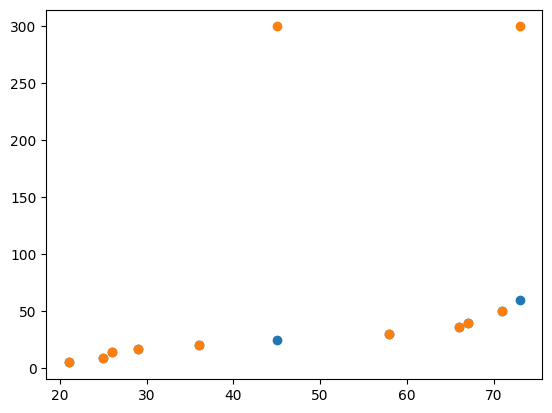

In [75]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 10 21:47:31 2023

@author: alejandromurrietamendoza
"""

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

# Create a Simple regression
# "Fix" the model (x_1 and y_1) to improve the r_squared
# You MUST use the cook's ditance concept

x_0 = np.array([21, 25, 26, 29, 36, 45, 58, 66, 67, 71, 73])
y_0 = np.array([5, 9, 14, 17, 20, 25, 30, 36, 40, 50, 60])


x_1 = np.array([21, 25, 26, 29, 36, 45, 58, 66, 67, 71, 73])
y_1 = np.array([5, 9, 14, 17, 20, 300, 30, 36, 40, 50, 300])

fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(x=x_0, y=y_0, label="0")
ax1.scatter(x=x_1, y=y_1, label="1")
plt.show()


In [76]:
model_1 = sm.OLS(y_1, sm.add_constant(x_1)).fit()
model_1.summary()

/home/pstet/code/foe-exercises/venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     1.662
Date:                Thu, 19 Oct 2023   Prob (F-statistic):              0.229
Time:                        20:18:33   Log-Likelihood:                -66.080
No. Observations:                  11   AIC:                             136.2
Df Residuals:                       9   BIC:                             137.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.2045     85.523     -0.318      0.758    -220.670     166.261
x1             2.1668      1.681      1.289      0.229      -1.635       5.969
==============================================================================
Omnibus:                        8.013   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                4.028
Skew:                           1.448   Prob(JB):                        0.133
Kurtosis:                       3.632   Cond. No.                         133.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
model_1.params

array([-27.20445854,   2.166826  ])

Here, the slope is 2.16 (${\beta}_1$), and the constant value is -27.2 (${\beta}_0$)

Equation:\
$f(x) = -27.2 + 2.16 \cdot x$

In [78]:
influence = model_1.get_influence()
cooks = influence.cooks_distance
cooks

(array([0.00338075, 0.00448155, 0.00294461, 0.00357535, 0.00620831,
        0.24863995, 0.03067999, 0.07052152, 0.07249346, 0.09544824,
        0.54612208]),
 array([0.99662623, 0.9955307 , 0.99706068, 0.99643245, 0.99381517,
        0.78504531, 0.96988684, 0.93241747, 0.93060931, 0.90987317,
        0.59723661]))

In [79]:
print(influence.hat_matrix_diag)

[0.25247697 0.20658787 0.19631062 0.16834695 0.11982878 0.09186511
 0.11982878 0.17719016 0.18651139 0.22857639 0.25247697]


The output above is the cooks distances and corresponding p-values respectively.

We can visualize these cooks distances using matplotlib

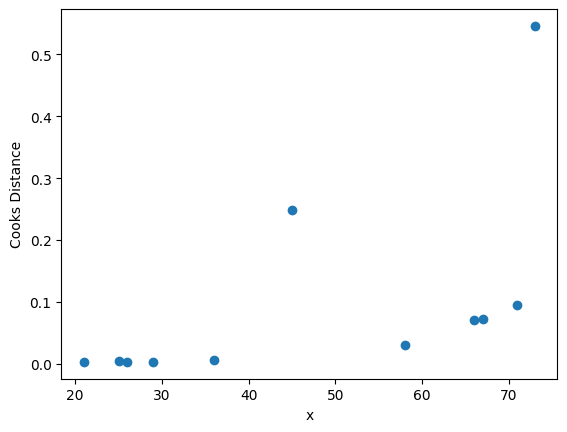

In [80]:
plt.scatter(x_0, cooks[0])
plt.xlabel("x")
plt.ylabel("Cooks Distance")
plt.show()

In [81]:
cooks_mean = np.mean(cooks[0])
max_cooks_dist = 2 * cooks_mean

max_cooks_dist

0.19718105645201478

In [82]:
outliers = np.where(cooks[0] > max_cooks_dist)

outliers

(array([ 5, 10]),)

In [83]:
x_0 = np.delete(x_0, outliers)
y_0 = np.delete(y_0, outliers)

(x_0, y_0)

(array([21, 25, 26, 29, 36, 58, 66, 67, 71]),
 array([ 5,  9, 14, 17, 20, 30, 36, 40, 50]))

With the outliers deleted, let's refit the model

In [84]:
model_0 = sm.OLS(y_0, sm.add_constant(x_0)).fit()
model_0.summary()

/home/pstet/code/foe-exercises/venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     113.9
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           1.39e-05
Time:                        20:18:33   Log-Likelihood:                -23.940
No. Observations:                   9   AIC:                             51.88
Df Residuals:                       7   BIC:                             52.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0878      3.240     -2.187      0.065     -14.750       0.575
x1             0.7138      0.067     10.672      0.000       0.556       0.872
==============================================================================
Omnibus:                        0.702   Durbin-Watson:                   1.104
Prob(Omnibus):                  0.704   Jarque-Bera (JB):                0.620
Skew:                           0.392   Prob(JB):                        0.733
Kurtosis:                       1.981   Cond. No.                         120.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

New formula for linear regression:\
$f(x) = -7.0878 + 0.71 \cdot x$

Old formula:\
$f(x) = -27.2 + 2.16 \cdot x$

Let's compare the residuals:

In [85]:
model_1.resid

array([-13.29888754, -17.96619155, -15.13301756, -18.63349557,
       -30.80127759, 229.69728837, -68.47144968, -79.80605771,
       -77.97288371, -76.64018773, 169.02616026])

In [86]:
model_0.resid

array([-2.90116279, -1.75620155,  2.53003876,  3.38875969,  1.39244186,
       -4.31027132, -4.02034884, -0.73410853,  6.41085271])

Text(0.5, 1.0, 'Difference in residuals of models')

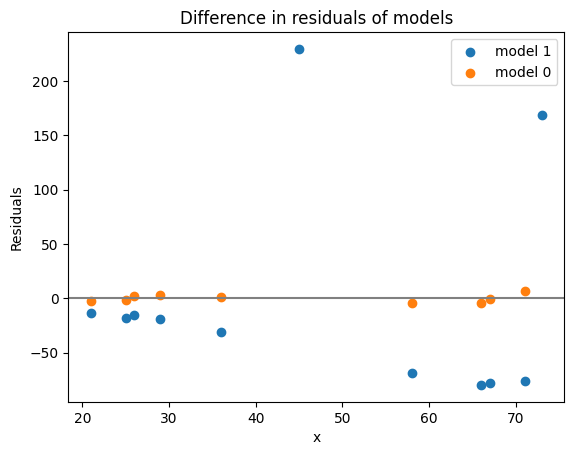

In [100]:
plt.scatter(x=x_1, y=model_1.resid, label="model 1")
plt.scatter(x=x_0, y=model_0.resid, label="model 0")
plt.axhline(0, color='gray')
plt.legend()
plt.xlabel("x")
plt.ylabel("Residuals")
plt.title("Difference in residuals of models")